# PREVENTING FRAUDULENT TRANSACTIONS

In [9]:
# Importing necessary libraries
# For data wrangling
import pandas as pd
import numpy as np

#For visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Read the data frame
data = pd.read_csv('Payment_Data.csv')

In [11]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [12]:
data.shape

(39221, 8)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [14]:
# Checking missing values
data.isna().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [15]:
# Get unique count for each variable
data.nunique()

accountAgeDays           1999
numItems                   14
localTime                  25
paymentMethod               3
paymentMethodAgeDays    17094
Category                    3
isWeekend                   2
label                       2
dtype: int64

In [16]:
data.dtypes

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
Category                 object
isWeekend               float64
label                     int64
dtype: object

So we mostly have categorical variables and 3 continuous variables

In [17]:
data.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label'],
      dtype='object')

## Exploratory Data Analysis

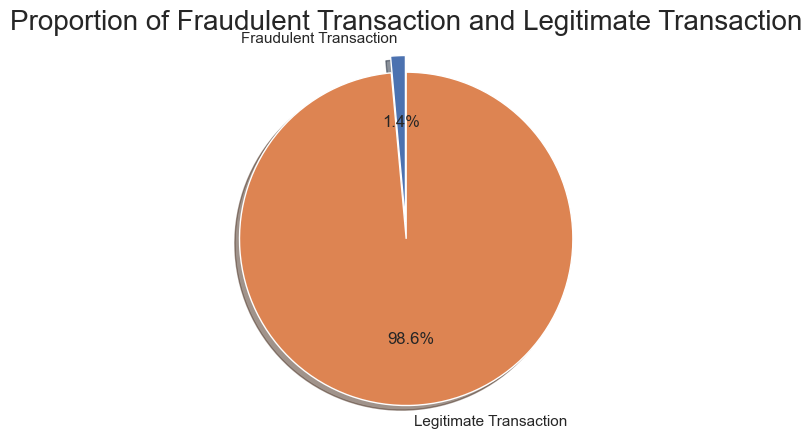

In [18]:
labels = 'Fraudulent Transaction', 'Legitimate Transaction'
sizes = [data.label[data['label']==1].count(), data.label[data['label']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Fraudulent Transaction and Legitimate Transaction", size = 20)
plt.show()

So about 1.4% of people are fraudulent. From this we can see that it is highly an imbalanced dataset.

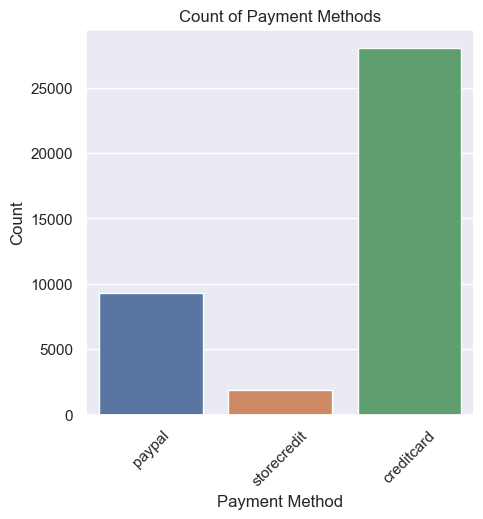

In [19]:
# Categorical feature visualization
plt.figure(figsize=(5,5))
sns.countplot(x='paymentMethod', data=data)
plt.title('Count of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Most of the transactions are done through credit card

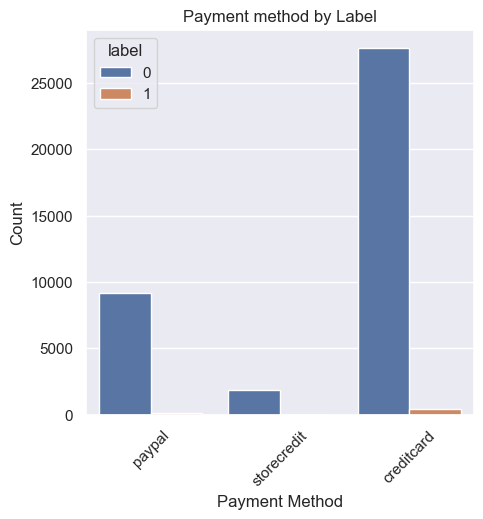

In [20]:
# Bar plot for Payment method by label
plt.figure(figsize=(5,5))
sns.countplot(x='paymentMethod', hue='label', data=data)
plt.title('Payment method by Label')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this plot we can see that the fraudulent transactions are done through credit card only.

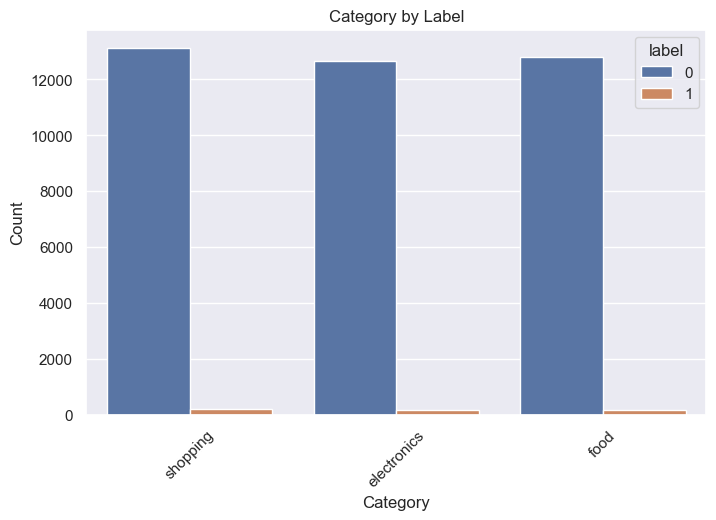

In [21]:
# Bar plot for Category by Label
plt.figure(figsize=(8,5))
sns.countplot(x='Category', hue='label', data=data)
plt.title('Category by Label')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In this plot the fraudulent transactions happens in all categories

<Axes: xlabel='label', ylabel='numItems'>

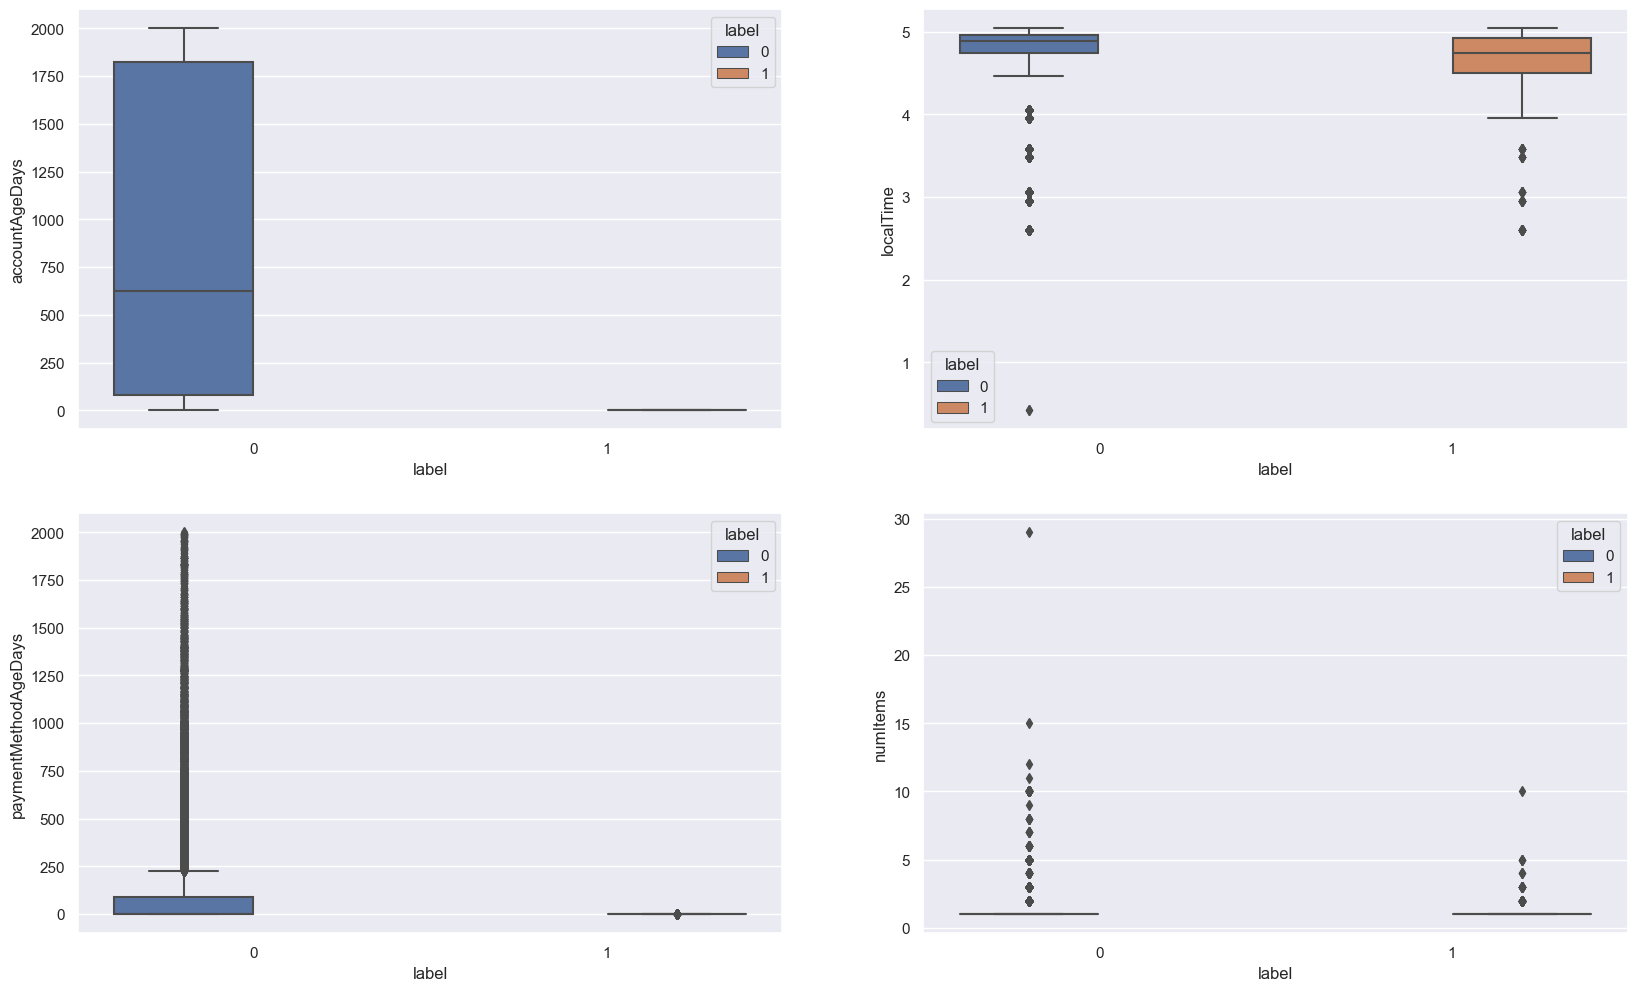

In [22]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='accountAgeDays',x = 'label', hue = 'label',data = data, ax=axarr[0][0])
sns.boxplot(y='localTime',x = 'label', hue = 'label',data = data , ax=axarr[0][1])
sns.boxplot(y='paymentMethodAgeDays',x = 'label', hue = 'label',data = data, ax=axarr[1][0])
sns.boxplot(y='numItems',x = 'label', hue = 'label',data = data, ax=axarr[1][1])

## Data Preprocessing

In [23]:
data.isna().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [24]:
# Filling missing values
data['Category'].fillna(data['Category'].mode()[0], inplace=True)
data['isWeekend'].fillna(data['isWeekend'].mode()[0], inplace=True)

In [25]:
data.isna().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

In [26]:
# Checking for duplicates
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f'Total duplicates {num_duplicates}')

Total duplicates 3046


In [27]:
data = data.drop_duplicates()

In [28]:
data.shape

(36175, 8)

In [29]:
# Creating a copy of dataset for model building
data_model = data.copy()
data_model.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [30]:
# Repacing outlier with fenced IQR values:

for feature in data_model:
    if data_model[feature].dtype!='O' and len(data_model[feature].unique())>2:
        lower_quartile = data_model[feature].quantile(0.25)
        upper_quartile = data_model[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data_model[feature] = np.where(data_model[feature]>upper_fence, 
                                upper_fence, 
                                data_model[feature])
        
        data_model[feature] = np.where(data_model[feature]<lower_fence,
                               lower_fence,
                               data_model[feature])

<Axes: xlabel='label', ylabel='numItems'>

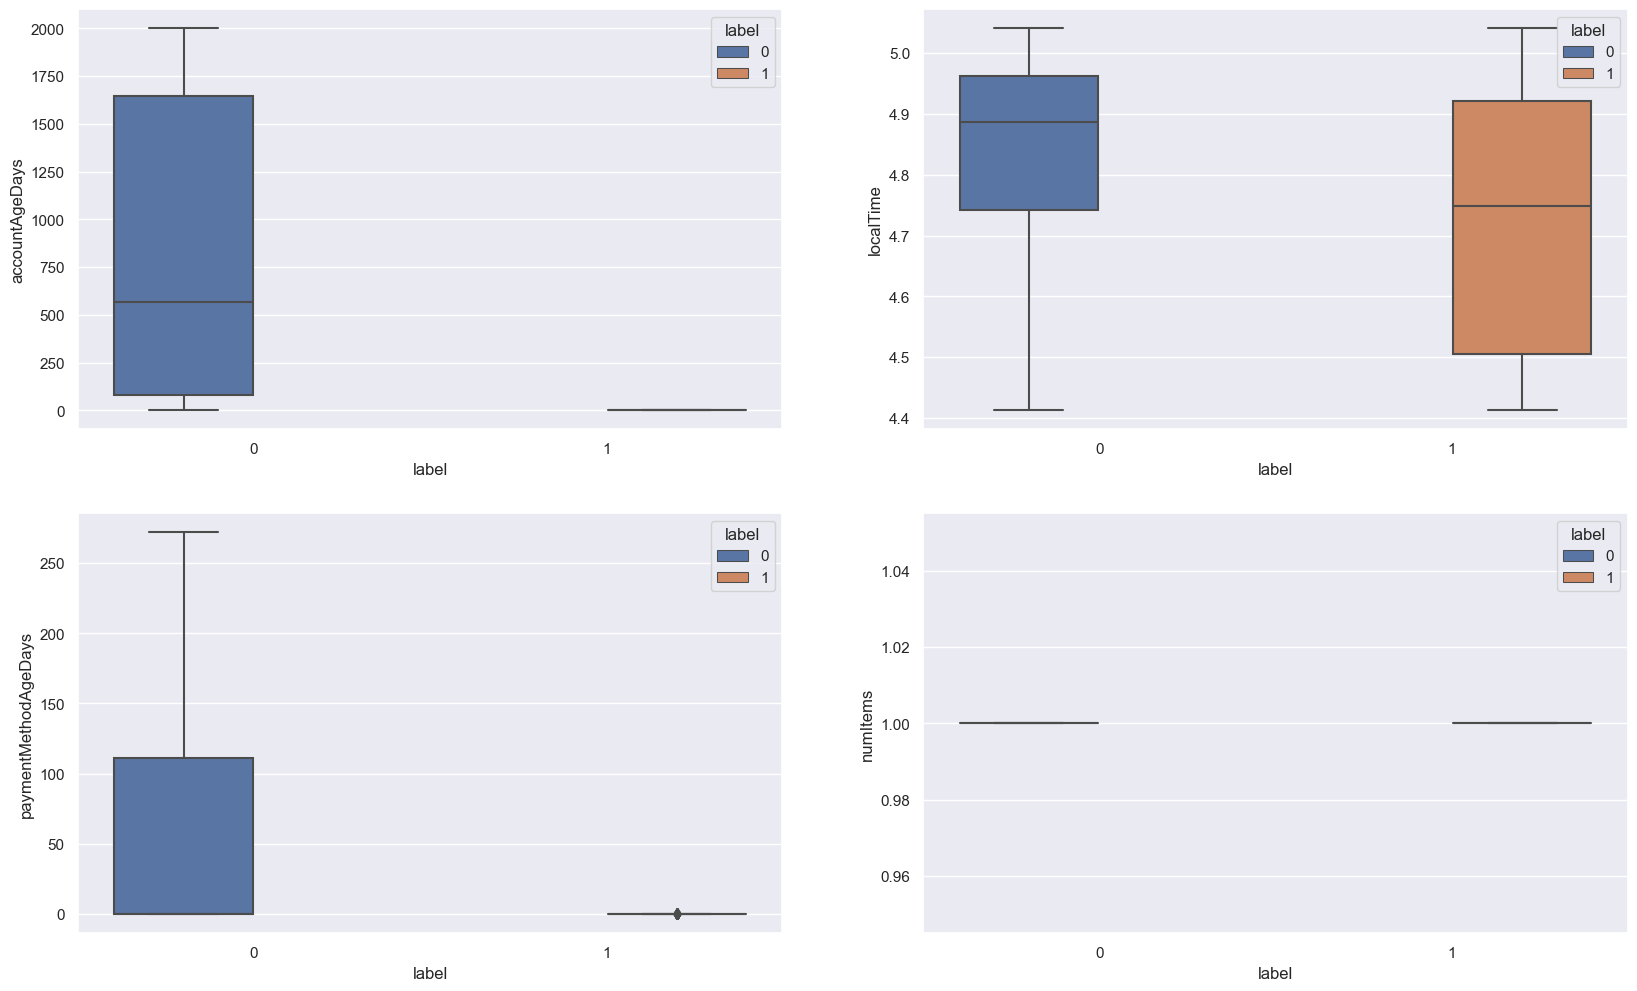

In [31]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='accountAgeDays',x = 'label', hue = 'label',data = data_model, ax=axarr[0][0])
sns.boxplot(y='localTime',x = 'label', hue = 'label',data = data_model , ax=axarr[0][1])
sns.boxplot(y='paymentMethodAgeDays',x = 'label', hue = 'label',data = data_model, ax=axarr[1][0])
sns.boxplot(y='numItems',x = 'label', hue = 'label',data = data_model, ax=axarr[1][1])

In [32]:
# Function to convert LocalTime to readable format
def convert_local_time(local_time):
    hours = int(local_time)
    minutes = int((local_time - hours) * 60)
    period = "AM" if hours < 12 else "PM"
    hours = hours % 12
    if hours == 0:
        hours = 12
    return f"{hours}:{minutes:02d} {period}"

In [33]:
# Apply the function to the LocalTime column
data_model['FormattedLocalTime'] = data_model['localTime'].apply(convert_local_time)

In [34]:
# Display the rows to verify the conversion
print(data_model[['localTime', 'FormattedLocalTime']].head())

   localTime FormattedLocalTime
0   4.745402            4:44 AM
1   4.742303            4:44 AM
2   4.921318            4:55 AM
3   4.886641            4:53 AM
4   5.040929            5:02 AM


In [35]:
data_model = data_model.drop('localTime', axis=1)

In [36]:
data_model.head()

,accountAgeDays,numItems,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label,FormattedLocalTime
0,29.0,1.0,paypal,28.204861,shopping,0.0,0,4:44 AM
1,725.0,1.0,storecredit,0.000000,electronics,0.0,0,4:44 AM
2,845.0,1.0,creditcard,0.000000,food,1.0,0,4:55 AM
3,503.0,1.0,creditcard,0.000000,electronics,1.0,0,4:53 AM
4,2000.0,1.0,creditcard,0.000000,shopping,0.0,0,5:02 AM


In [37]:
# Encoding the categorical variables using one-hot encoding
data_model = pd.get_dummies(data_model, columns=['paymentMethod', 'Category'], drop_first=True)

In [38]:
data_model.head()

,accountAgeDays,numItems,paymentMethodAgeDays,isWeekend,label,FormattedLocalTime,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29.0,1.0,28.204861,0.0,0,4:44 AM,1,0,0,1
1,725.0,1.0,0.000000,0.0,0,4:44 AM,0,1,0,0
2,845.0,1.0,0.000000,1.0,0,4:55 AM,0,0,1,0
3,503.0,1.0,0.000000,1.0,0,4:53 AM,0,0,0,0
4,2000.0,1.0,0.000000,0.0,0,5:02 AM,0,0,0,1


In [39]:
data_model.shape

(36175, 10)

In [40]:
# Convert the 'FormattedLocalTime' column to datetime
data_model['FormattedLocalTime'] = pd.to_datetime(data_model['FormattedLocalTime'])

In [41]:
data['Hour'] = data_model['FormattedLocalTime'].dt.hour

In [42]:
data_model['Minute'] = data_model['FormattedLocalTime'].dt.minute

In [43]:
data_model = data_model.drop('FormattedLocalTime', axis=1)

In [44]:
data_model.head()

,accountAgeDays,numItems,paymentMethodAgeDays,isWeekend,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping,Minute
0,29.0,1.0,28.204861,0.0,0,1,0,0,1,44
1,725.0,1.0,0.000000,0.0,0,0,1,0,0,44
2,845.0,1.0,0.000000,1.0,0,0,0,1,0,55
3,503.0,1.0,0.000000,1.0,0,0,0,0,0,53
4,2000.0,1.0,0.000000,0.0,0,0,0,0,1,2


In [45]:
data_model['label'].value_counts()

0    35784
1      391
Name: label, dtype: int64

## Handling Imbalance

In [46]:
# From the EDA we have found that the dataset is heavily imbalanced.
# This has to be handled before model building.
# Oversampling can be used.

In [47]:
X_imbal = data_model.drop('label', axis=1)
y_imbal = data_model['label']
print('Shape of X and y before sampling: ', X_imbal.shape, y_imbal.shape)

Shape of X and y before sampling:  (36175, 9) (36175,)


In [48]:
from imblearn.combine import SMOTETomek  #Synthetic Minority Oversampling TEchnique - Tomek
smote_model = SMOTETomek(random_state=42)
X_balanced, y_balanced = smote_model.fit_resample(X_imbal, y_imbal)
print('Shape of X and y after sampling: ', X_balanced.shape, y_balanced.shape)

Shape of X and y after sampling:  (71568, 9) (71568,)


In [49]:
# Merging the balanced dataset
balanced_data = pd.concat([X_balanced, y_balanced], axis=1)
print('Shape of the balanced dataset is: ',balanced_data.shape)
balanced_data.head()

Shape of the balanced dataset is:  (71568, 10)


,accountAgeDays,numItems,paymentMethodAgeDays,isWeekend,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping,Minute,label
0,29.0,1.0,28.204861,0.0,1,0,0,1,44,0
1,725.0,1.0,0.000000,0.0,0,1,0,0,44,0
2,845.0,1.0,0.000000,1.0,0,0,1,0,55,0
3,503.0,1.0,0.000000,1.0,0,0,0,0,53,0
4,2000.0,1.0,0.000000,0.0,0,0,0,1,2,0


In [50]:
balanced_data['label'].value_counts()

0    35784
1    35784
Name: label, dtype: int64

### Train and Test dataset

In [51]:
from sklearn.model_selection import train_test_split
x = balanced_data.drop('label', axis=1)
y = balanced_data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (50097, 9)
Shape of x_test:  (21471, 9)
Shape of y_train:  (50097,)
Shape of y_test:  (21471,)


## MODEL BUILDING

### Logistic Regression

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_sacled = scaler.transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [54]:
# Initializing and training the model
LR_model = LogisticRegression(random_state=42)
LR_model.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [47]:
# Prediction on the test data
LR_y_pred = LR_model.predict(x_test_sacled)

In [48]:
# Evaluation
print(classification_report(y_test, LR_y_pred))
print(confusion_matrix(y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10728
           1       0.93      1.00      0.96     10743

    accuracy                           0.96     21471
   macro avg       0.96      0.96      0.96     21471
weighted avg       0.96      0.96      0.96     21471

[[ 9898   830]
 [    0 10743]]


### Hyperparameter Tuning on Logistic Regression using GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Define the parameter grid
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.01, 0.1, 1, 10, 100],
    'solver' : ['liblinear', 'saga'],
    'class_weight' : ['balanced', None]
}

In [51]:
grid_search = GridSearchCV(estimator=LR_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [52]:
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [53]:
best_params = grid_search.best_params_

In [54]:
best_score = grid_search.best_score_

In [55]:
print(f'Best parameters {best_params}')
print(f'Best cross-validation score {best_score}')

Best parameters {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score 0.98429047285208


In [56]:
best_model = grid_search.best_estimator_

In [57]:
best_model.fit(x_train_scaled, y_train) 

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [58]:
# Predict on the test data
LR_y_pred = best_model.predict(x_test_sacled)
y_pred_proba = best_model.predict_proba(x_test_sacled)[:, 1]

In [59]:
print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     10728
           1       0.97      1.00      0.99     10743

    accuracy                           0.99     21471
   macro avg       0.99      0.99      0.99     21471
weighted avg       0.99      0.99      0.99     21471



In [60]:
print(confusion_matrix(y_test, LR_y_pred))

[[10419   309]
 [    0 10743]]


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

accuracy = accuracy_score(y_test, LR_y_pred)
precision = precision_score(y_test, LR_y_pred)
recall = recall_score(y_test, LR_y_pred)
f1 = f1_score(y_test, LR_y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9856084951795445
Precision: 0.9720412595005429
Recall: 1.0
F1 Score: 0.9858224363386098
ROC AUC Score: 0.9993767337391124


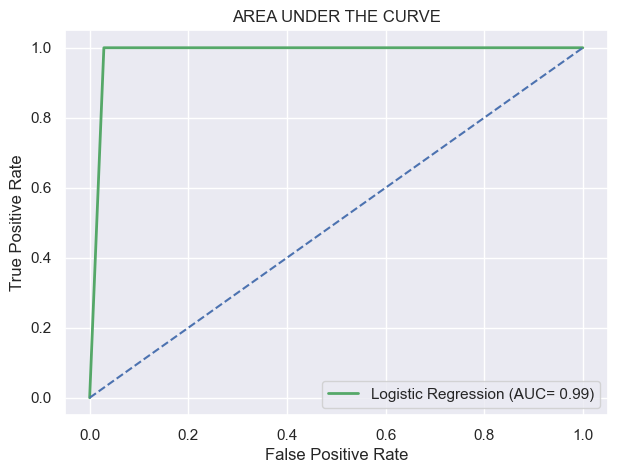

In [62]:
# Plotting area under the curve
tpr, fpr, _ = roc_curve(y_test, LR_y_pred)
au_roc = auc(tpr, fpr)

plt.figure(figsize=(7,5))
plt.plot(tpr, fpr, lw=2, label=f'Logistic Regression (AUC= {np.round(au_roc,2)})', color='g')
plt.plot([0,1], ls='--')
plt.title('AREA UNDER THE CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## TREE BASED MODELS

### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
# Initialize and train the model
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
# Prediction on the test data
DT_y_pred = DT_model.predict(x_test)
DT_y_test_pred_proba = DT_model.predict_proba(x_test)[:, 1]

In [66]:
# Evaluation
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10728
           1       1.00      1.00      1.00     10743

    accuracy                           1.00     21471
   macro avg       1.00      1.00      1.00     21471
weighted avg       1.00      1.00      1.00     21471



In [67]:
print(confusion_matrix(y_test, DT_y_pred))

[[10728     0]
 [    0 10743]]


### Hyperparameter Tuning on Decision Tree using GridSearchCV

In [68]:
dt_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : [None, 'auto', 'sqrt', 'log2']
}

In [69]:
# Initializing GridSearchCV with cross-validation
dt_grid_search = GridSearchCV(estimator=DT_model, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [70]:
dt_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [71]:
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_

In [72]:
print(f'Best Parameters: {dt_best_params}')
print(f'Best Cross-Validation Score: {dt_best_score}')

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 1.0


In [73]:
dt_best_model = dt_grid_search.best_estimator_

In [74]:
# Predict on the test data
dt_y_pred = dt_best_model.predict(x_test)

In [75]:
dt_y_pred_proba = dt_best_model.predict_proba(x_test)[:, 1]

In [76]:
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10728
           1       1.00      1.00      1.00     10743

    accuracy                           1.00     21471
   macro avg       1.00      1.00      1.00     21471
weighted avg       1.00      1.00      1.00     21471

[[10728     0]
 [    0 10743]]


In [77]:
# Evaluate using other metrics
accuracy = accuracy_score(y_test, dt_y_pred)
precision = precision_score(y_test, dt_y_pred)
recall = recall_score(y_test, dt_y_pred)
f1 = f1_score(y_test, dt_y_pred)
roc_auc = roc_auc_score(y_test, dt_y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


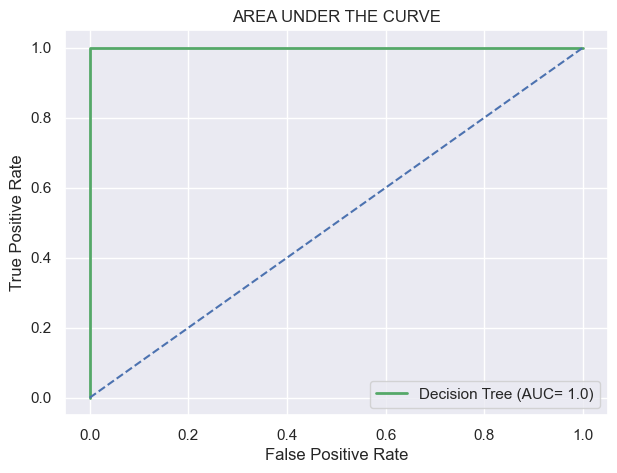

In [78]:
# Plotting area under the curve
tpr, fpr, _ = roc_curve(y_test, dt_y_pred)
au_roc = auc(tpr, fpr)

plt.figure(figsize=(7,5))
plt.plot(tpr, fpr, lw=2, label=f'Decision Tree (AUC= {np.round(au_roc,2)})', color='g')
plt.plot([0,1], ls='--')
plt.title('AREA UNDER THE CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Prediction on the test data
RF_y_pred = RF_model.predict(x_test)
RF_y_test_pred_prob = RF_model.predict_proba(x_test)[:, 1]

In [82]:
# Evaluation
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10728
           1       1.00      1.00      1.00     10743

    accuracy                           1.00     21471
   macro avg       1.00      1.00      1.00     21471
weighted avg       1.00      1.00      1.00     21471



In [83]:
print(confusion_matrix(y_test, RF_y_pred))

[[10728     0]
 [    0 10743]]


### Hyperparameter Tuning on Random Forest using GridSearchCV

In [84]:
rf_param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'bootstrap' : [True, False]
}

In [85]:
# Initialize the GridSearchCV
rf_grid_search = GridSearchCV(estimator=RF_model, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

In [86]:
# Fit the GridSearchCV
rf_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [87]:
# Get the best parameters and the best score
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

In [88]:
print(f'Best Parameters: {rf_best_params}')
print(f'Best Cross-Validation Score: {rf_best_score}')

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 1.0


In [89]:
rf_best_model = rf_grid_search.best_estimator_
# Predict on the test data
rf_y_pred = rf_best_model.predict(x_test)

In [90]:
rf_y_pred_proba = rf_best_model.predict_proba(x_test)[:, 1]

In [91]:
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10728
           1       1.00      1.00      1.00     10743

    accuracy                           1.00     21471
   macro avg       1.00      1.00      1.00     21471
weighted avg       1.00      1.00      1.00     21471

[[10728     0]
 [    0 10743]]


In [92]:
# Evaluate using other metrics
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)
recall = recall_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)
roc_auc = roc_auc_score(y_test, rf_y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


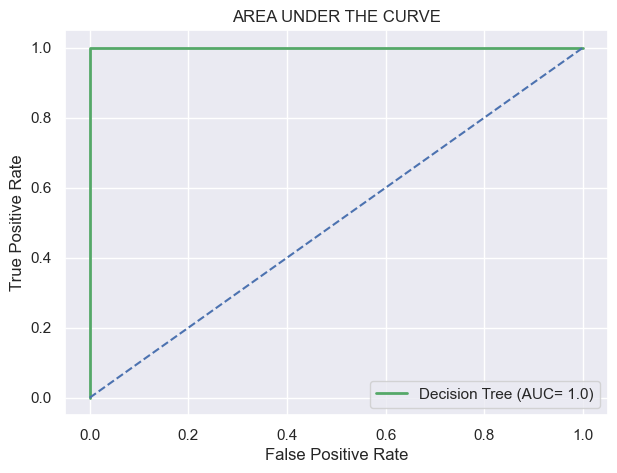

In [93]:
# Plotting area under the curve
tpr, fpr, _ = roc_curve(y_test, rf_y_pred)
au_roc = auc(tpr, fpr)

plt.figure(figsize=(7,5))
plt.plot(tpr, fpr, lw=2, label=f'Decision Tree (AUC= {np.round(au_roc,2)})', color='g')
plt.plot([0,1], ls='--')
plt.title('AREA UNDER THE CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### SVM

In [55]:
from sklearn.svm import SVC

In [56]:
# Initialize and train the model
SVM_model = SVC(probability=True, random_state=42)
SVM_model.fit(x_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [57]:
# Prediction on test data
SVM_y_pred = SVM_model.predict(x_test_sacled)
SVM_y_test_pred_proba = SVM_model.predict_proba(x_test_sacled)[:, 1]

In [58]:
# Evaluation
print(classification_report(y_test, SVM_y_pred))
print(confusion_matrix(y_test, SVM_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     10728
           1       0.92      1.00      0.96     10743

    accuracy                           0.96     21471
   macro avg       0.96      0.96      0.96     21471
weighted avg       0.96      0.96      0.96     21471

[[ 9786   942]
 [   12 10731]]


### Hyperparameter Tuning on SVM using GridSearchCV

In [98]:
# svm_param_grid = {
#     'C' : [0.1, 1, 10, 100],
#     'gamma' : [1, 0.1, 0.01, 0.001],
#     'kernel' : ['rbf', 'poly', 'sigmoid'],
#     'degree' : [2, 3, 4]
# }

In [99]:
# # Initialize the GridSearch with Cross-validation
# svm_grid_search = GridSearchCV(estimator=SVM_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [100]:
# # Fit the GridSearchCV 
# svm_grid_search.fit(x_train_scaled, y_train)

In [101]:
# # Get the best parameters and the best score
# svm_best_params = svm_grid_search.best_params_
# svm_best_score = svm_grid_search.best_score_

In [102]:
# print(f'Best Parameters: {svm_best_params}')
# print(f'Best Cross-Validation Score: {svm_best_score}')

In [103]:
# svm_best_model = svm_grid_search.best_estimator_

In [104]:
# # Predict on the test data
# svm_y_pred = svm_best_model.predict(x_test)

# # If you want to get probabilities instead of class labels
# svm_y_pred_proba = svm_best_model.predict_proba(x_test)[:, 1]

In [105]:
# print(classification_report(y_test, svm_y_pred))

In [106]:
# # Evaluate using other metrics
# accuracy = accuracy_score(y_test, svm_y_pred)
# precision = precision_score(y_test, svm_y_pred)
# recall = recall_score(y_test, svm_y_pred)
# f1 = f1_score(y_test, svm_y_pred)
# roc_auc = roc_auc_score(y_test, svm_y_pred_proba)

In [107]:
# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1}')
# print(f'ROC AUC Score: {roc_auc}')

In [108]:
# # Plotting area under the curve
# tpr, fpr, _ = roc_curve(y_test, svm_y_pred)
# au_roc = auc(tpr, fpr)

# plt.figure(figsize=(7,5))
# plt.plot(tpr, fpr, lw=2, label=f'Decision Tree (AUC= {np.round(au_roc,2)})', color='g')
# plt.plot([0,1], ls='--')
# plt.title('AREA UNDER THE CURVE')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc=4)
# plt.show()

In [109]:
# KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [112]:
# Prediction on test data
KNN_y_pred = KNN_model.predict(x_test_sacled)
KNN_y_test_pred_proba = KNN_model.predict_proba(x_test_sacled)[:, 1]

In [113]:
# Evaluation
print(classification_report(y_test, KNN_y_pred))
print(confusion_matrix(y_test, KNN_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     10728
           1       0.99      1.00      1.00     10743

    accuracy                           1.00     21471
   macro avg       1.00      1.00      1.00     21471
weighted avg       1.00      1.00      1.00     21471

[[10644    84]
 [    2 10741]]


### Hyperparameter Tuning on KNN Using GridSearchCV

In [114]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [115]:
knn_grid_search = GridSearchCV(estimator=KNN_model, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [116]:
knn_grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [117]:
# Get the best parameters and the best score
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

In [118]:
print(f'Best Parameters: {knn_best_params}')
print(f'Best Cross-Validation Score: {knn_best_score}')

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Score: 0.9981835211700563


In [121]:
knn_best_model = knn_grid_search.best_estimator_

In [129]:
knn_y_pred = knn_best_model.predict(x_test_sacled)
knn_y_pred_proba = knn_best_model.predict_proba(x_test_sacled)[:, 1]

In [130]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10728
           1       1.00      1.00      1.00     10743

    accuracy                           1.00     21471
   macro avg       1.00      1.00      1.00     21471
weighted avg       1.00      1.00      1.00     21471



In [131]:
print(confusion_matrix(y_test, knn_y_pred))

[[10705    23]
 [    2 10741]]


In [132]:
accuracy = accuracy_score(y_test, knn_y_pred)
precision = precision_score(y_test, knn_y_pred)
recall = recall_score(y_test, knn_y_pred)
f1 = f1_score(y_test, knn_y_pred)
roc_auc = roc_auc_score(y_test, knn_y_pred_proba)

In [133]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9988356387685715
Precision: 0.9978632478632479
Recall: 0.9998138322628688
F1 Score: 0.998837587762124
ROC AUC Score: 0.9993469986144317


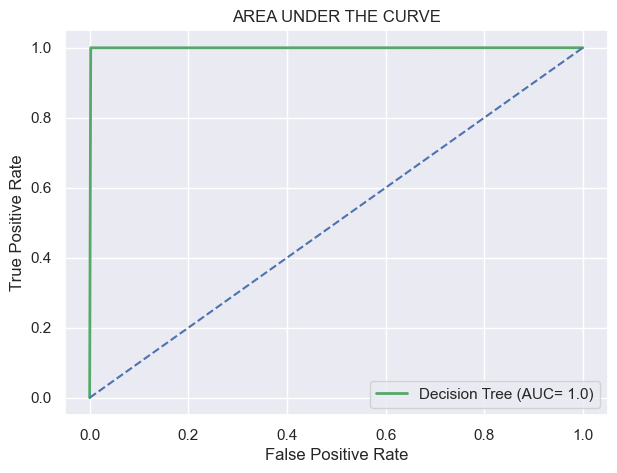

In [134]:
# Plotting area under the curve
tpr, fpr, _ = roc_curve(y_test, knn_y_pred)
au_roc = auc(tpr, fpr)

plt.figure(figsize=(7,5))
plt.plot(tpr, fpr, lw=2, label=f'Decision Tree (AUC= {np.round(au_roc,2)})', color='g')
plt.plot([0,1], ls='--')
plt.title('AREA UNDER THE CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()